In [52]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Function to generate random timestamps
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Set the number of entries
num_users = 1000
num_sessions = 5000

# Define start and end date for session data
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 10, 10)

# Generate User IDs, Webtoon IDs, and other data
user_data = {
    'UserID': [random.randint(1, num_users) for _ in range(num_sessions)],
    'SessionID': [f"S{random.randint(1000, 9999)}" for _ in range(num_sessions)],
    'DateTime': [random_date(start_date, end_date) for _ in range(num_sessions)],
    'WebtoonID': [f"W{random.randint(1, 500)}" for _ in range(num_sessions)],
    'PageViews': [random.randint(1, 20) for _ in range(num_sessions)],
    'AvgTimeSpent': [round(random.uniform(1, 15), 2) for _ in range(num_sessions)], # minutes
    'BounceRate': [random.choice([0, 1]) for _ in range(num_sessions)], # 0 = no bounce, 1 = bounce
    'DeviceType': [random.choice(['Mobile', 'Desktop', 'Tablet']) for _ in range(num_sessions)],
    'Location': [random.choice(['USA', 'Japan', 'India', 'South Korea', 'UK', 'Germany']) for _ in range(num_sessions)],
    'UserType': [random.choice(['New', 'Returning']) for _ in range(num_sessions)]
}

# Create DataFrame
df = pd.DataFrame(user_data)
# Generate random ages for users
df['Age'] = [random.randint(13, 50) for _ in range(num_sessions)]

# Define function to categorize age into groups
def categorize_age(age):
    if age < 18:
        return '13-17'
    elif age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    else:
        return '45+'

# Apply the function to create AgeGroup column
df['AgeGroup'] = df['Age'].apply(categorize_age)

# Display the first 10 rows of the dataset
df.head(10)


,UserID,SessionID,DateTime,WebtoonID,PageViews,AvgTimeSpent,BounceRate,DeviceType,Location,UserType,Age,AgeGroup
0,277,S1474,2024-06-20 05:16:29,W221,19,9.17,1,Tablet,UK,Returning,41,35-44
1,857,S6460,2024-07-09 03:42:13,W362,1,6.93,0,Tablet,India,New,33,25-34
2,321,S8292,2024-09-08 05:30:26,W366,16,5.71,0,Mobile,USA,Returning,28,25-34
3,972,S1274,2024-01-05 01:48:57,W446,18,14.71,0,Tablet,India,Returning,21,18-24
4,566,S4381,2024-04-11 08:48:54,W31,10,9.88,1,Tablet,South Korea,Returning,29,25-34
5,733,S1970,2024-08-22 14:58:42,W410,15,9.33,1,Tablet,Japan,Returning,18,18-24
6,697,S6105,2024-05-11 23:27:54,W302,3,7.06,1,Desktop,Germany,Returning,46,45+
7,457,S8301,2024-09-21 04:42:39,W55,9,11.14,1,Mobile,UK,New,27,25-34
8,826,S5001,2024-07-04 19:59:10,W113,9,1.97,0,Tablet,USA,Returning,28,25-34
9,546,S4724,2024-02-11 03:42:21,W182,7,3.72,0,Desktop,South Korea,New,47,45+


In [53]:
import pandas as pd

# Assuming you have a DataFrame `df` with your data
df.to_csv('D:/Internship Assignment/user_data.csv', index=False)  # Replace 'user_data.csv' with your desired filename


In [54]:
# Analyzing the most viewed webtoons helps in understanding user preferences.
# Total page views per webtoon
page_views_per_webtoon = df.groupby('WebtoonID')['PageViews'].sum().sort_values(ascending=False).head(10)
print(page_views_per_webtoon)


WebtoonID
W480    241
W322    240
W470    209
W194    209
W448    208
W329    206
W397    205
W159    205
W392    197
W211    194
Name: PageViews, dtype: int64


In [55]:
# Understanding how much time users spend on each webtoon is crucial for identifying which content keeps users engaged.
# Average time spent per webtoon
avg_time_per_webtoon = df.groupby('WebtoonID')['AvgTimeSpent'].mean().sort_values(ascending=False).head(10)
print(avg_time_per_webtoon)


WebtoonID
W171    13.285000
W307    12.780000
W120    12.756000
W163    11.994286
W325    11.387500
W156    11.051250
W355    10.970000
W6      10.868889
W213    10.747500
W424    10.731111
Name: AvgTimeSpent, dtype: float64


In [56]:
# Bounce rate measures if users leave after viewing only one page. A high bounce rate can indicate issues like poor content quality or load times.
# Bounce rate per webtoon
bounce_rate_per_webtoon = df.groupby('WebtoonID')['BounceRate'].mean().sort_values(ascending=False).head(10)
print(bounce_rate_per_webtoon)


WebtoonID
W481    1.000000
W21     1.000000
W193    1.000000
W88     1.000000
W35     1.000000
W160    0.909091
W346    0.900000
W436    0.900000
W409    0.888889
W71     0.875000
Name: BounceRate, dtype: float64


In [57]:
# Analyze which device users are engaging with more, so you can optimize your platform for the most-used device.
# Sessions per device type
device_type_sessions = df['DeviceType'].value_counts()
print(device_type_sessions)


DeviceType
Desktop    1703
Tablet     1664
Mobile     1633
Name: count, dtype: int64


In [58]:
# Check which regions are most engaged with the content. This could help in tailoring the content or marketing strategies.
# Sessions by location
location_sessions = df['Location'].value_counts()
print(location_sessions)


Location
UK             884
Germany        845
USA            829
India          817
South Korea    814
Japan          811
Name: count, dtype: int64


In [59]:
# Understanding the proportion of new vs. returning users helps you measure user retention.
# New vs Returning users
user_type_distribution = df['UserType'].value_counts()
print(user_type_distribution)


UserType
New          2595
Returning    2405
Name: count, dtype: int64


`Optimization`

In [60]:
# Content Optimization
# For webtoons with high page views but low average time spent or high bounce rates, focus on improving user engagement.
# Webtoons with high page views but low average time spent
webtoon_engagement = df.groupby('WebtoonID').agg({
    'PageViews': 'sum',
    'AvgTimeSpent': 'mean',
    'BounceRate': 'mean'
}).reset_index()

# Filter for high page views and low average time spent (you can adjust thresholds)
high_views_low_time = webtoon_engagement[(webtoon_engagement['PageViews'] > 100) & 
                                         (webtoon_engagement['AvgTimeSpent'] < 5)]

print(high_views_low_time)


    WebtoonID  PageViews  AvgTimeSpent  BounceRate
201      W280        143      4.992857    0.357143
459       W62        111      4.535000    0.583333


In [61]:
# Webtoons with high bounce rates
high_bounce_webtoons = webtoon_engagement[webtoon_engagement['BounceRate'] > 0.6]  # Bounce rate > 60%
print(high_bounce_webtoons)


    WebtoonID  PageViews  AvgTimeSpent  BounceRate
0          W1        161      8.732778    0.666667
4        W102        127      6.160000    0.666667
5        W103         80      6.596364    0.636364
6        W104         95      7.572222    0.777778
7        W105        150      7.692308    0.615385
..        ...        ...           ...         ...
485       W86        162      8.600000    0.769231
487       W88         84      7.088571    1.000000
488       W89        119      6.185000    0.700000
495       W95        155      7.924000    0.666667
496       W96        133      7.669091    0.636364

[124 rows x 4 columns]


In [62]:
# To improve the experience on the most-used devices (e.g., mobile), identify which webtoons have performance issues on specific devices and tailor optimizations accordingly
# Average time spent and bounce rate per device type
device_performance = df.groupby('DeviceType').agg({
    'AvgTimeSpent': 'mean',
    'BounceRate': 'mean'
}).reset_index()

print(device_performance)


  DeviceType  AvgTimeSpent  BounceRate
0    Desktop      7.935725    0.487375
1     Mobile      7.857250    0.504593
2     Tablet      7.938840    0.493990


In [63]:
# Top performing webtoons for recommendations
top_webtoons = df.groupby('WebtoonID')['PageViews'].sum().sort_values(ascending=False).head(10)
print(top_webtoons)


WebtoonID
W480    241
W322    240
W470    209
W194    209
W448    208
W329    206
W397    205
W159    205
W392    197
W211    194
Name: PageViews, dtype: int64


In [64]:
# Webtoon engagement by location
location_engagement = df.groupby('Location').agg({
    'PageViews': 'sum',
    'AvgTimeSpent': 'mean',
    'BounceRate': 'mean'
}).sort_values(by='PageViews', ascending=False).reset_index()

print(location_engagement)


      Location  PageViews  AvgTimeSpent  BounceRate
0           UK       9326      8.131776    0.464932
1          USA       8796      7.940869    0.475271
2        India       8752      7.912191    0.495716
3      Germany       8741      7.700615    0.493491
4  South Korea       8496      7.835725    0.504914
5        Japan       8454      7.934192    0.540074


In [65]:
# Engagement for new vs returning users
user_engagement = df.groupby('UserType').agg({
    'PageViews': 'mean',
    'AvgTimeSpent': 'mean',
    'BounceRate': 'mean'
}).reset_index()

print(user_engagement)


    UserType  PageViews  AvgTimeSpent  BounceRate
0        New  10.518304      7.878539    0.503276
1  Returning  10.507277      7.946299    0.486486


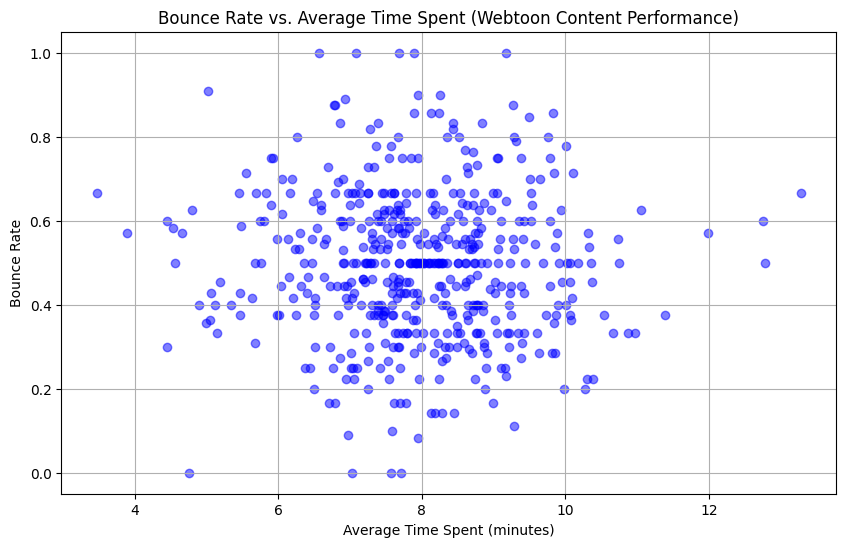

In [66]:
import matplotlib.pyplot as plt

# Visualization: Bounce Rate vs. Average Time Spent for Webtoons
plt.figure(figsize=(10,6))
plt.scatter(webtoon_engagement['AvgTimeSpent'], webtoon_engagement['BounceRate'], c='blue', alpha=0.5)
plt.title('Bounce Rate vs. Average Time Spent (Webtoon Content Performance)')
plt.xlabel('Average Time Spent (minutes)')
plt.ylabel('Bounce Rate')
plt.grid(True)
plt.show()


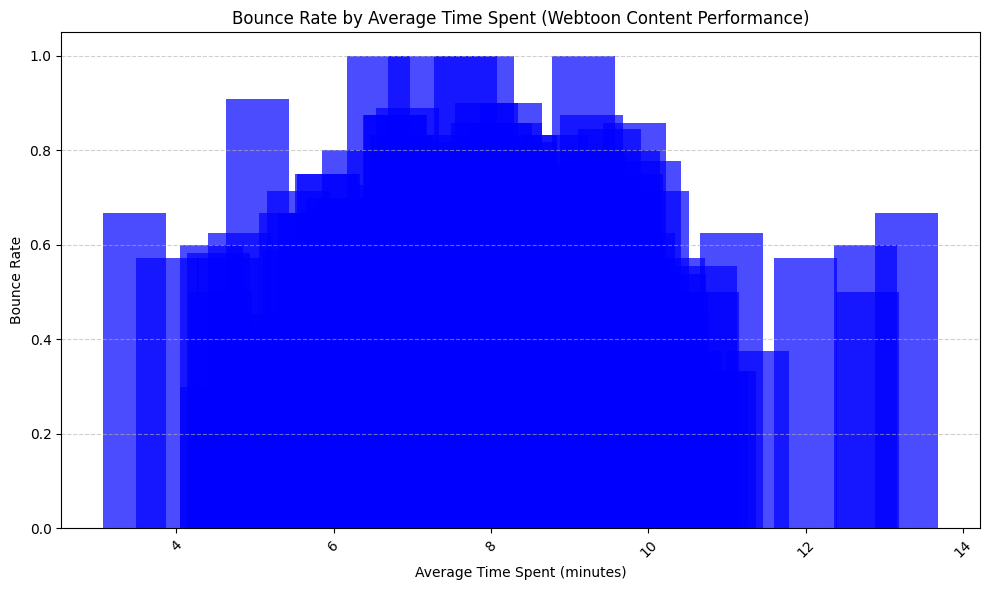

In [67]:
import matplotlib.pyplot as plt

# Assuming 'webtoon_engagement' is a DataFrame with 'AvgTimeSpent' and 'BounceRate' columns

# Group data by 'AvgTimeSpent' (assuming it represents unique time bins)
avg_time_spent_groups = webtoon_engagement.groupby('AvgTimeSpent')['BounceRate'].mean()
avg_time_spent = avg_time_spent_groups.index.to_numpy()  # Extract time spent values
bounce_rate = avg_time_spent_groups.to_numpy()  # Extract bounce rate values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_time_spent, bounce_rate, color='blue', alpha=0.7)

# Customize the plot
plt.title('Bounce Rate by Average Time Spent (Webtoon Content Performance)')
plt.xlabel('Average Time Spent (minutes)')
plt.ylabel('Bounce Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines to y-axis
plt.tight_layout()  # Adjust spacing between elements
plt.show()

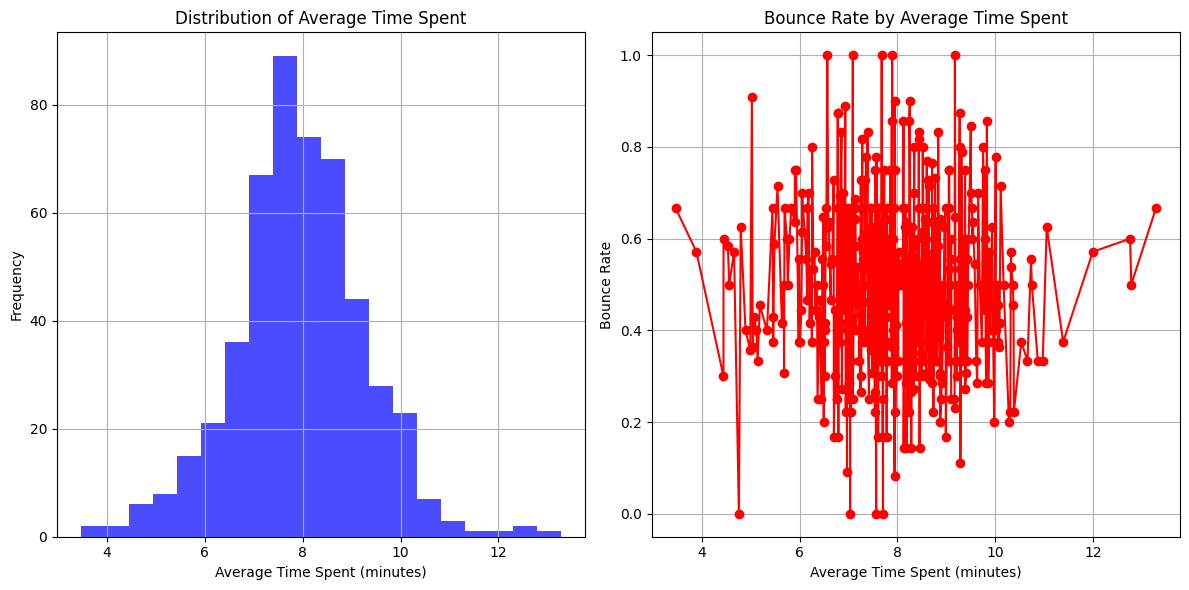

In [68]:
import matplotlib.pyplot as plt

# Assuming 'webtoon_engagement' is a DataFrame with 'AvgTimeSpent' and 'BounceRate' columns

# Group data by 'AvgTimeSpent' (assuming it represents unique time bins)
avg_time_spent_groups = webtoon_engagement.groupby('AvgTimeSpent')['BounceRate'].mean()
avg_time_spent = avg_time_spent_groups.index.to_numpy()  # Extract time spent values
bounce_rate = avg_time_spent_groups.to_numpy()  # Extract bounce rate values

# Create the figure and subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Histogram plot
ax1.hist(webtoon_engagement['AvgTimeSpent'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of Average Time Spent')
ax1.set_xlabel('Average Time Spent (minutes)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Line plot
ax2.plot(avg_time_spent, bounce_rate, color='red', marker='o')
ax2.set_title('Bounce Rate by Average Time Spent')
ax2.set_xlabel('Average Time Spent (minutes)')
ax2.set_ylabel('Bounce Rate')
ax2.grid(True)

plt.tight_layout()
plt.show()

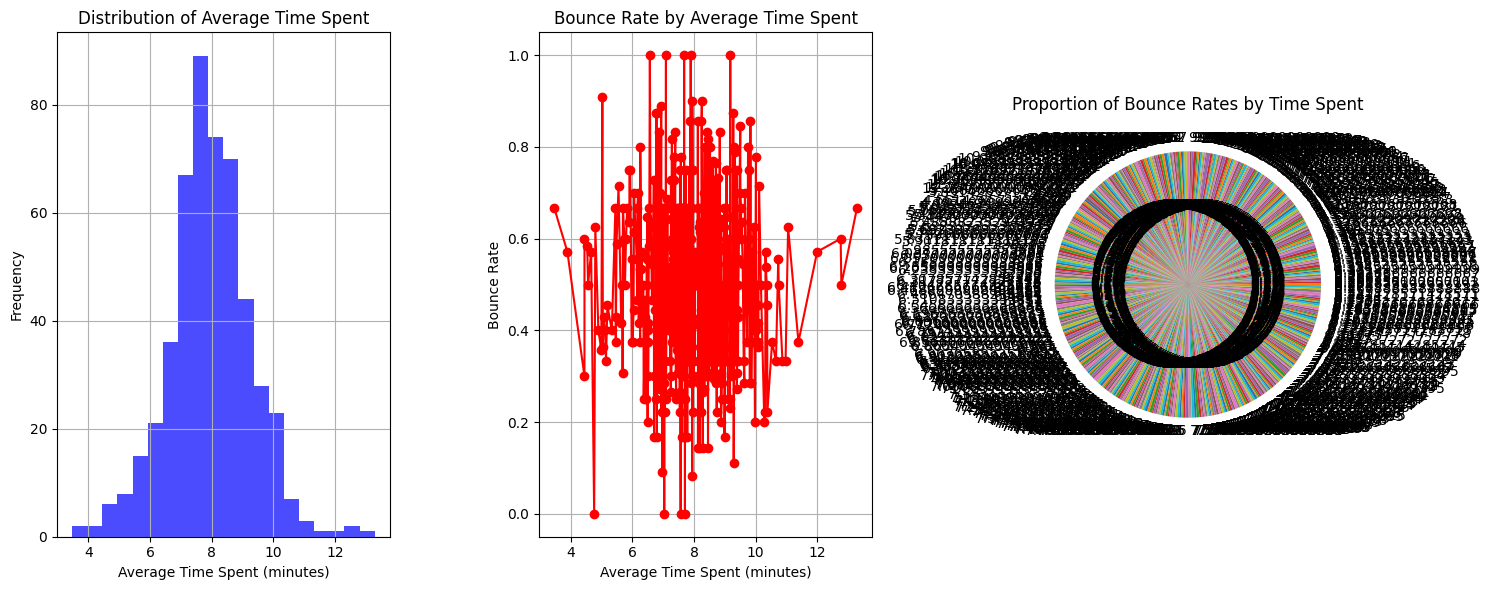

In [69]:
import matplotlib.pyplot as plt

# Assuming 'webtoon_engagement' is a DataFrame with 'AvgTimeSpent' and 'BounceRate' columns

# Group data by 'AvgTimeSpent' (assuming it represents unique time bins)
avg_time_spent_groups = webtoon_engagement.groupby('AvgTimeSpent')['BounceRate'].mean()
avg_time_spent = avg_time_spent_groups.index.to_numpy()  # Extract time spent values
bounce_rate = avg_time_spent_groups.to_numpy()  # Extract bounce rate values

# Create the figure and subplots
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)


# Histogram plot
ax1.hist(webtoon_engagement['AvgTimeSpent'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of Average Time Spent')
ax1.set_xlabel('Average Time Spent (minutes)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Line plot
ax2.plot(avg_time_spent, bounce_rate, color='red', marker='o')
ax2.set_title('Bounce Rate by Average Time Spent')
ax2.set_xlabel('Average Time Spent (minutes)')
ax2.set_ylabel('Bounce Rate')
ax2.grid(True)

# Pie chart (assuming you want to show the proportion of bounce rates for different time spent bins)
ax3.pie(bounce_rate, labels=avg_time_spent, autopct='%1.1f%%', startangle=140)
ax3.set_title('Proportion of Bounce Rates by Time Spent')


plt.tight_layout()
plt.show()

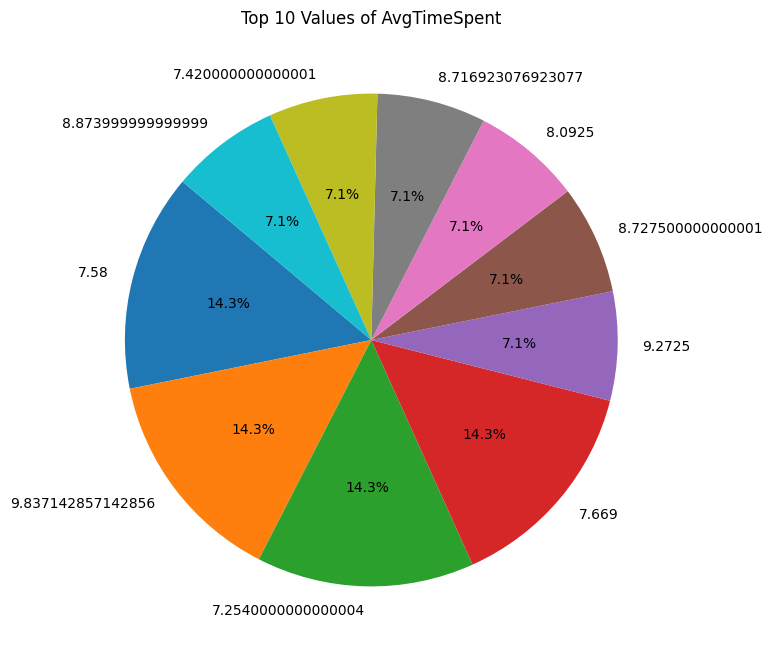

In [70]:
# Assuming 'webtoon_engagement' is your DataFrame
column_to_visualize = 'AvgTimeSpent'  # Replace with the actual column name

# Calculate value counts and select top 10
value_counts = webtoon_engagement[column_to_visualize].value_counts()
top_10_values = value_counts.head(10)


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_values, labels=top_10_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Values of ' + column_to_visualize)
plt.show()

In [71]:
print(df.columns)


Index(['UserID', 'SessionID', 'DateTime', 'WebtoonID', 'PageViews',
       'AvgTimeSpent', 'BounceRate', 'DeviceType', 'Location', 'UserType',
       'Age', 'AgeGroup'],
      dtype='object')


In [3]:
import pandas as pd
df = pd.read_csv("D:/Internship Assignment/user_data.csv")

In [73]:
# Assuming `original_data` is the DataFrame containing all the necessary columns
webtoon_engagement = df.groupby(['WebtoonID', 'DeviceType', 'UserType']).agg({
    'PageViews': 'sum',
    'AvgTimeSpent': 'mean',
    'BounceRate': 'mean'
}).reset_index()


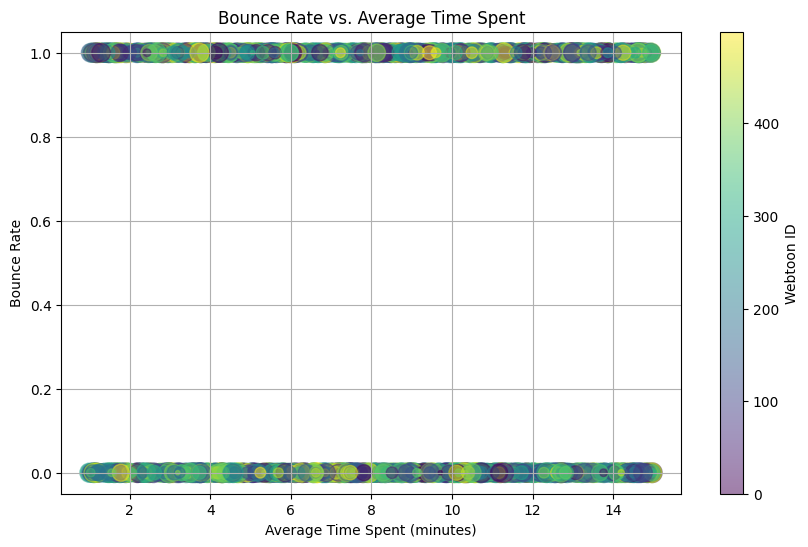

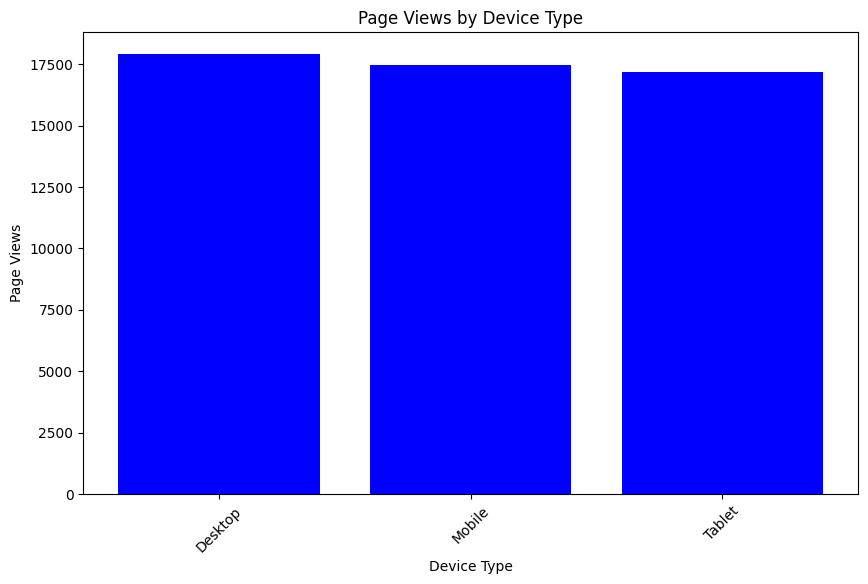

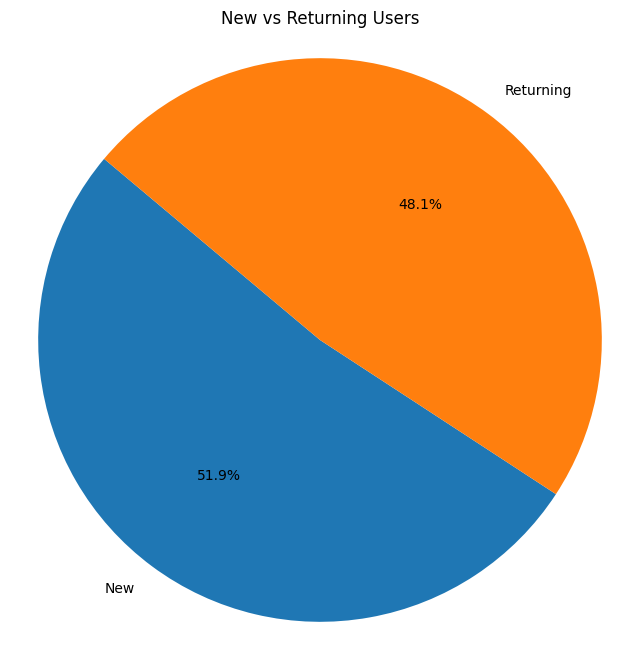

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Scatter plot: Bounce Rate vs. Avg Time Spent
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['AvgTimeSpent'], df['BounceRate'], 
                      s=df['PageViews'] * 10,  # Scale the size
                      c=df['WebtoonID'].astype('category').cat.codes,  # Color based on WebtoonID
                      alpha=0.5)
plt.colorbar(scatter, label='Webtoon ID')
plt.title('Bounce Rate vs. Average Time Spent')
plt.xlabel('Average Time Spent (minutes)')
plt.ylabel('Bounce Rate')
plt.grid(True)
plt.savefig('D:/Internship Assignment/Task1/scatter.png')
plt.show()

# Bar chart: Page Views by Device Type
device_data = df.groupby('DeviceType')['PageViews'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(device_data['DeviceType'], device_data['PageViews'], color='blue')
plt.title('Page Views by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Page Views')
plt.xticks(rotation=45)
plt.savefig('D:/Internship Assignment/Task1/bar_chart.png')
plt.show()

# Pie chart: User Type Distribution
user_type_data = df['UserType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(user_type_data, labels=user_type_data.index, autopct='%1.1f%%', startangle=140)
plt.title('New vs Returning Users')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.savefig('D:/Internship Assignment/Task1/pie_chart.png')
plt.show()
